In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import networkx as nx
import pickle

import sys
sys.path.insert(1, '../../')
from utils import *

In [2]:
dataset = 'pr_school'

In [3]:
weighted = True

In [4]:
thresholds = [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]
if dataset == 'pr_school':
    thresholds = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16]

mu = 0.1

In [ ]:
plt.rcParams.update({'font.size': 15})

## Generate similarity matrix:

In [5]:
def load_C_mean(filename):
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            C = np.array([float(i) for i in row])
    return C

In [6]:
# cosine similarity between vectors
def similarity(v1,v2):
    
    return np.sum(v1*v2) / (np.sqrt((np.sum(v1*v1))*np.sum(v2*v2)))

In [7]:
def similarity_matrix(mu, thresholds,weighted):
    
    # load weights
    C_list = []

    for th in thresholds:
        if mu > 0:
            filename = "results/inf_treeSIR/C_mean_weighted_%s_th_%.2f_mu_%.3f.csv"%(dataset,th,mu)
        else:
            filename = "results/inf_treeSI/C_mean_weighted_%s_th_%.2f.csv"%(dataset,th)
        
        C = load_C_mean(filename)
        C_list.append(C)


    # compute similarity
    sim = np.full((len(thresholds),len(thresholds)),0.0)
    for i in range(len(thresholds)-1):
        for j in range(i+1,len(thresholds)):
            sim[i,j] = similarity(C_list[i],C_list[j])

   
            
    return sim, C_list

In [15]:
if dataset == 'pr_school':
    minValue_dataset = 0.6906763827664567
    maxValue_dataset = 0.9712661863066689
elif dataset == 'hospital':
    minValue_dataset = 0.5859676185492886
    maxValue_dataset = 0.9725345554627652
elif dataset == 'workplace':
    minValue_dataset = 0.6640920326980589
    maxValue_dataset = 0.9812107449339817
elif dataset == 'high_school':
    minValue_dataset = 0.4273770824044987 
    maxValue_dataset = 0.940444458075442
elif dataset == 'conference':
    minValue_dataset = 0.41928424527832536 
    maxValue_dataset = 0.9706776648953375

In [10]:
S, C_list = similarity_matrix(mu, thresholds,weighted)

In [11]:
S

array([[0.        , 0.9751149 , 0.9472587 , 0.92469375, 0.90047275,
        0.87795729, 0.85171062, 0.80359985, 0.74954997, 0.66889485],
       [0.        , 0.        , 0.97414329, 0.94944363, 0.92327644,
        0.90231808, 0.876767  , 0.8263655 , 0.76605611, 0.67931373],
       [0.        , 0.        , 0.        , 0.97516636, 0.94404215,
        0.92763457, 0.90468572, 0.85760863, 0.79476685, 0.69700996],
       [0.        , 0.        , 0.        , 0.        , 0.97819808,
        0.96274608, 0.93767678, 0.89069119, 0.82418598, 0.72040793],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.98121074, 0.9509962 , 0.90444879, 0.83577836, 0.74234501],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.97571235, 0.93870225, 0.8751961 , 0.77667314],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.97155162, 0.90955237, 0.81478292],
       [0.        , 0.        , 0.       

In [ ]:
figname = '../figs/cos_sim_%s_mu_%.2f.pdf'%(dataset,mu)

0.6688948469289505 0.9812107449339817
../figs/SIR_weighted_sim_workplace_mu_0.10.pdf


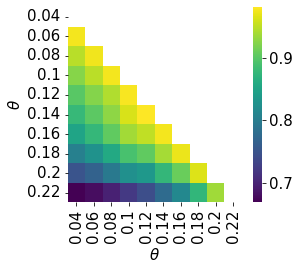

In [13]:
plot_sim(S, mu, thresholds, ax_label=r'$\theta$', save=True, figname=figname,
         scale='independent',min_scale = minValue_dataset,max_scale = maxValue_dataset)

0.6640920326980589 0.9812107449339817
../figs/SIR_weighted_sim_workplace_mu_0.10_colorscale.pdf


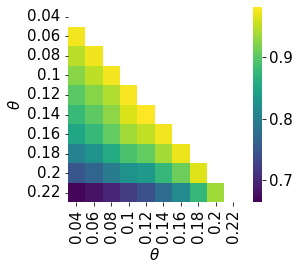

In [16]:
plot_sim(S, mu, thresholds, ax_label=r'$\theta$', save=True, figname=figname,
         scale='fixed',min_scale = minValue_dataset,max_scale = maxValue_dataset)